In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import time


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [86]:
df_white = pd.read_csv('winequality-white.csv', sep = ';')
df_red = pd.read_csv('winequality-red.csv', sep = ';')
df_combined = pd.concat([df_white, df_red])

datasets = [df_white, df_red,df_combined]

In [87]:
current_dataset = df_red

In [88]:
print(current_dataset.shape)
current_dataset.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [89]:
current_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [90]:
current_dataset[current_dataset['quality']==9].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pH,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sulphates,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
current_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [92]:
current_dataset.isnull().sum()/len(current_dataset)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [93]:
features = current_dataset.columns

In [94]:
def plots(dataset, feature):
    sns.set_style({'font.family': 'serif'})
    sns.set_context("paper", font_scale=1)

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,figsize = (6,4), gridspec_kw={"height_ratios": (.15, .85)})


    sns.boxplot(dataset[feature], ax=ax_box, color = 'lightgrey')
    sns.distplot(dataset[feature], ax=ax_hist, kde = False, color = 'black')


    ax_hist.set_ylabel('Freq',fontsize = 11)
    ax_hist.set_xlabel(feature,fontsize = 11)

    ax_box.set_xlabel('')

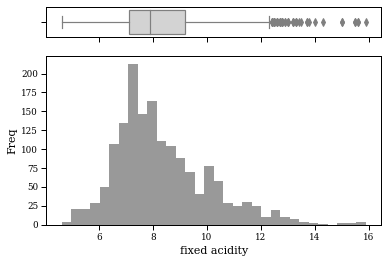

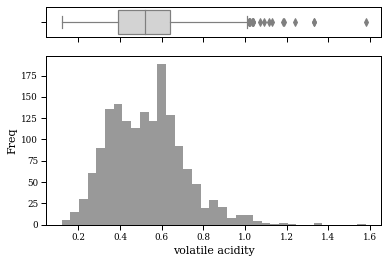

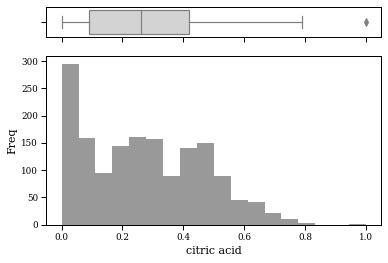

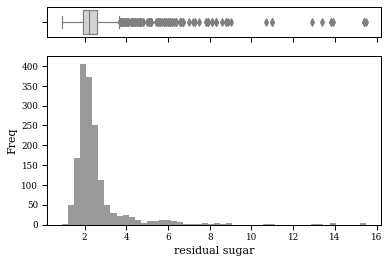

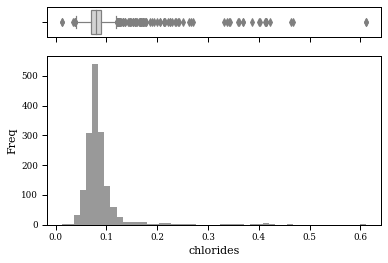

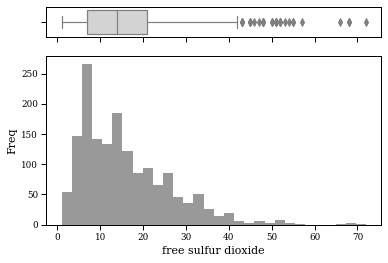

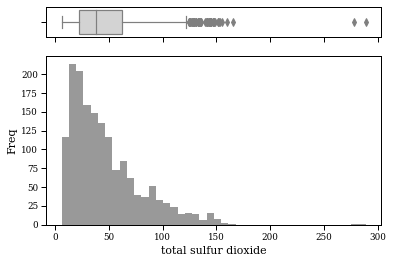

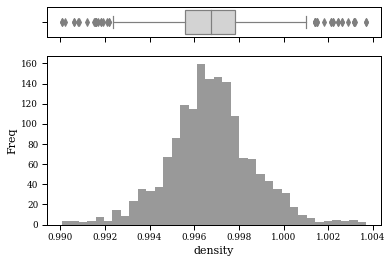

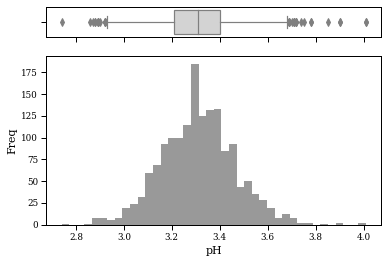

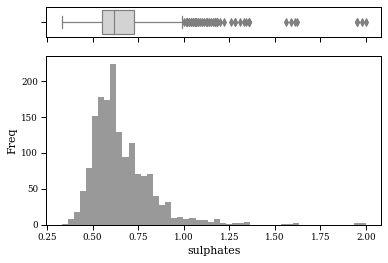

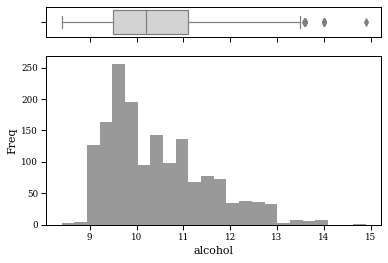

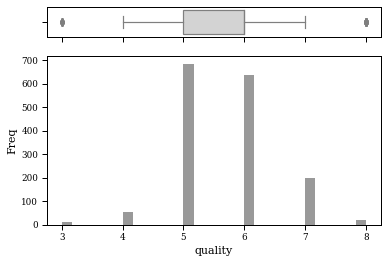

In [95]:
for i in features:
    plots(current_dataset, i)

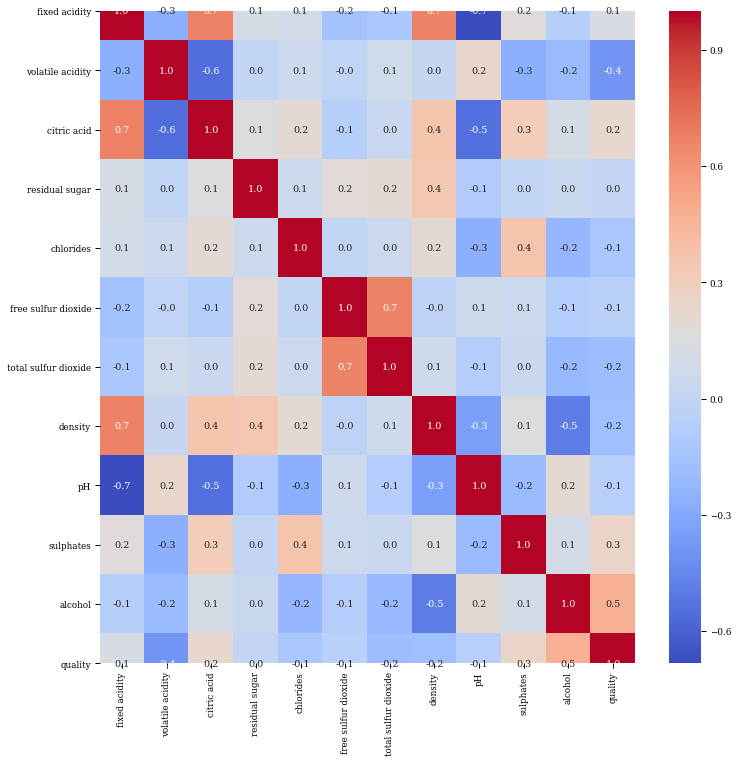

In [96]:
corr = current_dataset.corr()
fig, axs = plt.subplots(1,1,figsize=(12, 12))
sns.heatmap(corr, annot = True, cmap="coolwarm", fmt=".1f")

In [97]:
target = current_dataset['quality']
modeling_features = current_dataset.drop(['quality'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(modeling_features, target, test_size = 0.2, random_state = 12, stratify = current_dataset['quality'])

In [98]:
models = [
    LogisticRegression(),
    LinearSVC(),
    GaussianNB(),
    SGDClassifier(),         
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
         ]    

In [99]:
def test_models(models):
    names = []
    train_scores = []
    test_scores = []
    print("\t\t\t\tModels\n"+("="*76))
    for i in models:
        s = time.time()
        name = str(i).split("(")[0]
        clf = i
        clf = clf.fit(X_train, y_train)
        trainscore = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
        testscore = cross_val_score(clf, X_test, y_test, cv = 5,  scoring = 'accuracy')
        e = time.time()
        print(i)
        print("Trainset accuracy: %0.2f (+/- %0.2f)" % (trainscore.mean(), trainscore.std() * 2))
        print("Testset accuracy: %0.2f (+/- %0.2f)" % (testscore.mean(), testscore.std() * 2))
        print("Time:  %0.2f s" % (e-s))
        print("="*76)
        names.append(name)
        train_scores.append(trainscore.mean())
        test_scores.append(testscore.mean())
        
    return names, train_scores, test_scores
        
        
a,b,c = test_models(models)

				Models
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Trainset accuracy: 0.58 (+/- 0.05)
Testset accuracy: 0.57 (+/- 0.12)
Time:  0.79 s
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Trainset accuracy: 0.45 (+/- 0.06)
Testset accuracy: 0.49 (+/- 0.15)
Time:  2.73 s
GaussianNB(priors=None, var_smoothing=1e-09)
Trainset accuracy: 0.54 (+/- 0.06)
Testset accuracy: 0.47 (+/- 0.15)
Time:  0.05 s
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True

In [100]:
results = pd.DataFrame(data=zip(b,c),columns=['Train score','Test score'], index = a)
results.sort_values(by = ['Train score', 'Test score'], ascending = False)

,Train score,Test score
RandomForestClassifier,0.689614,0.621875
XGBClassifier,0.671654,0.600000
DecisionTreeClassifier,0.611409,0.515625
LogisticRegression,0.580916,0.565625
GaussianNB,0.537120,0.475000
SVC,0.505855,0.500000
KNeighborsClassifier,0.498814,0.487500
LinearSVC,0.448784,0.490625
SGDClassifier,0.417561,0.337500


In [103]:
param_grid = {'n_estimators': [100, 150, 200,300],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

if 1 == 1:
    booster_grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=3, n_jobs=-1, scoring = 'accuracy')
    booster_grid_search.fit(X_train, y_train)
    print(booster_grid_search.best_params_)

print("Grid search results for white wine: {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}")
print("Grid search results for white wine:{'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 150}")

{'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 150}
Grid search results for white wine: {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Grid search results for white wine:{'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 150}


In [102]:
clf = XGBClassifier(n_estimators = 150, max_depth = 7, learning_rate = 0.05, gamma = 0.2, colsample_bytree = 0.7)
clf = clf.fit(X_train, y_train)
trainscore = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
testscore = cross_val_score(clf, X_test, y_test, cv = 5,  scoring = 'accuracy')
print("Trainset accuracy: %0.2f (+/- %0.2f)" % (trainscore.mean(), trainscore.std() * 2))
print("Testset accuracy: %0.2f (+/- %0.2f)" % (testscore.mean(), testscore.std() * 2))
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


Trainset accuracy: 0.68 (+/- 0.05)
Testset accuracy: 0.61 (+/- 0.08)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.74      0.73       136
           6       0.59      0.70      0.64       128
           7       0.69      0.45      0.55        40
           8       0.50      0.33      0.40         3

    accuracy                           0.65       320
   macro avg       0.42      0.37      0.39       320
weighted avg       0.63      0.65      0.64       320

